# Results post-processing script

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('results_fea.csv')
# print(data)

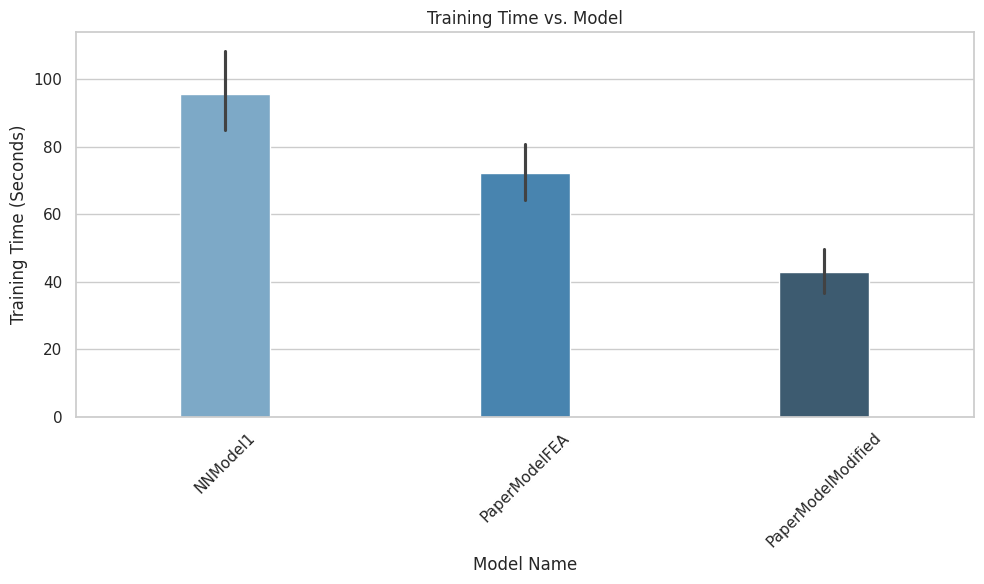

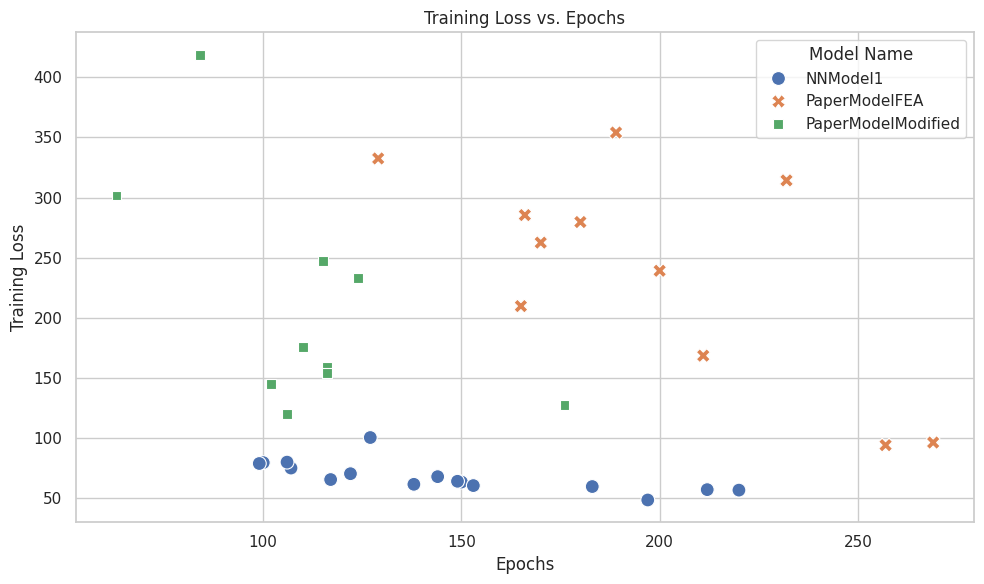

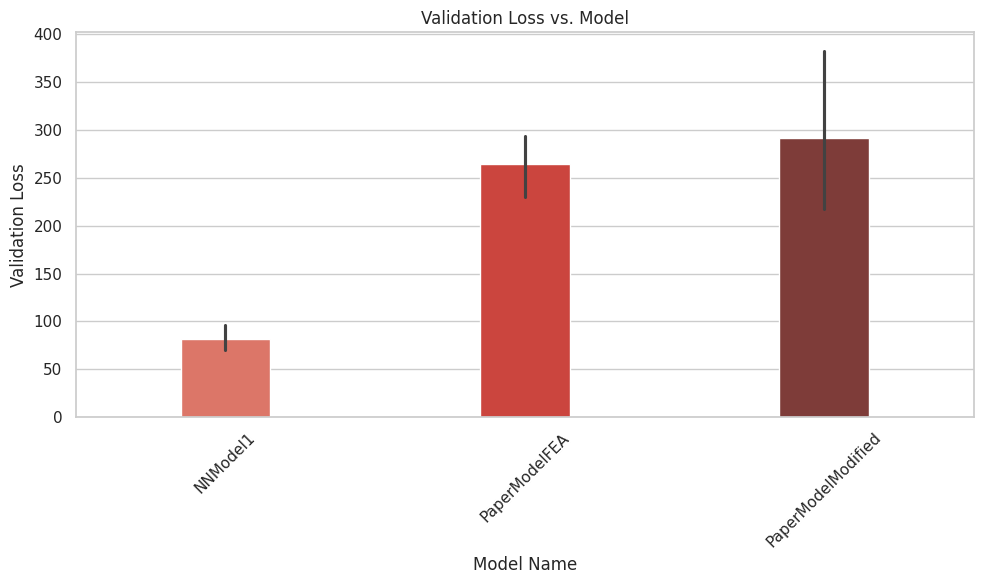

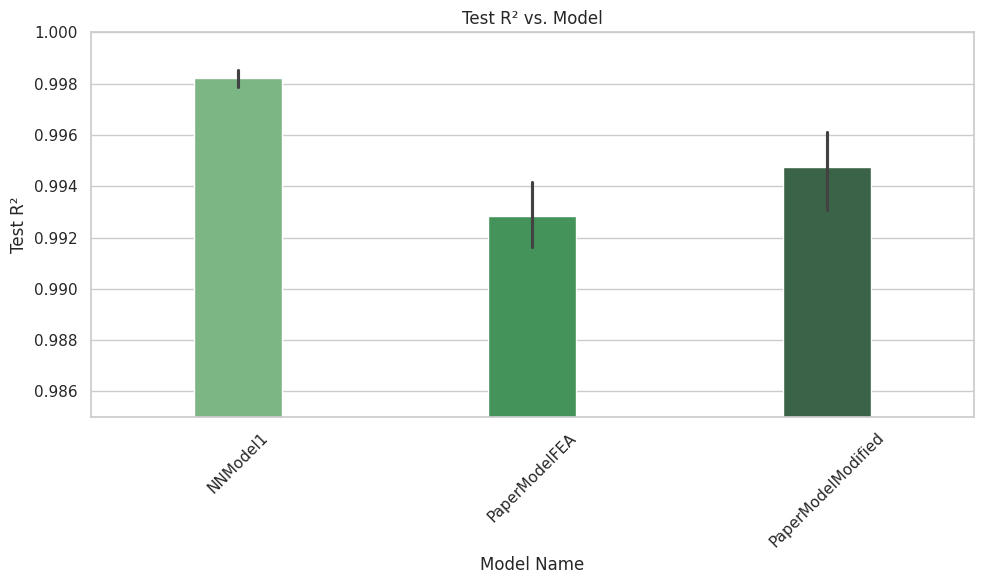

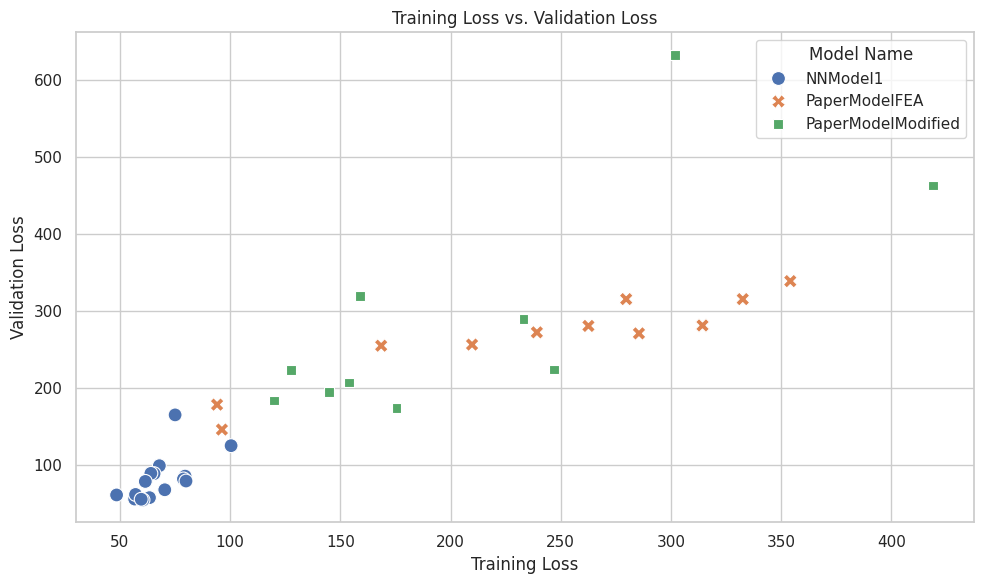

In [24]:
# Set the style for the plots
sns.set_theme(style="whitegrid")

# 1. Plot Training Time vs. Model
plt.figure(figsize=(10, 6))
sns.barplot(x='model_name', y='training_time_sec', data=data, palette="Blues_d", hue='model_name', width=0.3)
plt.title('Training Time vs. Model')
plt.xlabel('Model Name')
plt.ylabel('Training Time (Seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Plot Training Loss vs. Epochs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='training_epochs', y='loss', data=data, marker='o', style="model_name", hue='model_name', s=100)
plt.title('Training Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(title='Model Name')
plt.tight_layout()
plt.show()

# 3. Plot Validation Loss vs. Model
plt.figure(figsize=(10, 6))
sns.barplot(x='model_name', y='val_loss', data=data, palette="Reds_d", hue='model_name', width=0.3)
plt.title('Validation Loss vs. Model')
plt.xlabel('Model Name')
plt.ylabel('Validation Loss')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Plot R² vs. Model
plt.figure(figsize=(10, 6))
sns.barplot(x='model_name', y='test_r2', data=data, palette="Greens_d", hue='model_name', width=0.3)
plt.title('Test R² vs. Model')
plt.xlabel('Model Name')
plt.ylabel('Test R²')
plt.ylim(0.985, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Scatter Plot of Training Loss vs. Validation Loss
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loss', y='val_loss', data=data, hue='model_name', style='model_name', s=100)
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Training Loss')
plt.ylabel('Validation Loss')
plt.legend(title='Model Name')
plt.tight_layout()
plt.show()

In [12]:
# Group by model_name
# for model_name in data['model_name'].unique():
model_groups = data.groupby('model_name')

# Initialize a dictionary to store the results
results = {}

# Loop through each model group
for model_name, group in model_groups:
    # Calculate average and standard deviation for metrics (overall run)
    group.drop(columns=['model_name', 'hash'], inplace=True, errors='ignore')
    avg_metrics = group.mean()
    std_metrics = group.std()

    # Store results for overall run
    results[model_name] = {
        'n_samples': len(group),
        'avg_training_time_sec': avg_metrics['training_time_sec'],
        'std_training_time_sec': std_metrics['training_time_sec'],
        'avg_training_epochs': avg_metrics['training_epochs'],
        'std_training_epochs': std_metrics['training_epochs'],
        'avg_loss': avg_metrics['loss'],
        'std_loss': std_metrics['loss'],
        'avg_val_loss': avg_metrics['val_loss'],
        'std_val_loss': std_metrics['val_loss'],
        'avg_rel_test_err': avg_metrics['rel_test_err'],
        'std_rel_test_err': std_metrics['rel_test_err'],
        'avg_test_mae': avg_metrics['test_mae'],
        'std_test_mae': std_metrics['test_mae'],
        'avg_test_mse': avg_metrics['test_mse'],
        'std_test_mse': std_metrics['test_mse'],
        'avg_test_r2': avg_metrics['test_r2'],
        'std_test_r2': std_metrics['test_r2'],
    }

# Convert the results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)
print(results_df)

                         NNModel1  PaperModelFEA  PaperModelModified
n_samples               16.000000      11.000000           10.000000
avg_training_time_sec   95.720669      72.272373           42.915590
std_training_time_sec   24.871903      14.847075           10.950003
avg_training_epochs    145.250000     197.090909          111.200000
std_training_epochs     39.292917      42.314193           29.058562
avg_loss                68.062725     239.664855          208.177940
std_loss                12.490289      89.007035           94.283115
avg_val_loss            81.746900     264.634991          291.262590
std_val_loss            29.386811      57.399680          148.199800
avg_rel_test_err         0.178281       0.313282            0.278370
std_rel_test_err         0.039236       0.052952            0.035916
avg_test_mae             4.715400      10.769500            9.128080
std_test_mae             0.825181       1.858083            2.343977
avg_test_mse            62.697675 

In [18]:
def format_to_latex(results_df):
    latex_output = ''
    columns = results_df.columns.tolist()
    latex_output += r"""\begin{table}[h]
    \centering
    \begin{tabular}{|c||""" + 'c|c||' * len(columns) + r"""}
        \hline
        -- & """+ '&'.join([r'\multicolumn{2}{c||}{' + col + '}' for col in columns]) +r""" \\
        \# of samples & """+ '&'.join([r'\multicolumn{2}{c||}{' + f"{results_df[col]['n_samples']:.0f} samples" + '}' for col in columns]) +r""" \\
        \hline
        Metric & """ + ' & '.join([f"Avg & Std" for _ in columns]) + r""" \\
        \hline
        Training Time (s) & """ + ' & '.join([f"{results_df[col]['avg_training_time_sec']:.2f} & {results_df[col]['std_training_time_sec']:.2f}" for col in columns]) + r""" \\
        Training Epochs & """ + ' & '.join([f"{results_df[col]['avg_training_epochs']:.2f} & {results_df[col]['std_training_epochs']:.2f}" for col in columns]) + r""" \\
        Training Loss & """ + ' & '.join([f"{results_df[col]['avg_loss']:.4f} & {results_df[col]['std_loss']:.4f}" for col in columns]) + r""" \\
        Validation Loss & """ + ' & '.join([f"{results_df[col]['avg_val_loss']:.4f} & {results_df[col]['std_val_loss']:.4f}" for col in columns]) + r""" \\
        Relative Test Error & """ + ' & '.join([f"${results_df[col]['avg_rel_test_err']*100:.2f} \%$ & ${results_df[col]['std_rel_test_err']*100:.2f} \%$" for col in columns]) + r""" \\
        Test MAE & """ + ' & '.join([f"{results_df[col]['avg_test_mae']:.4f} & {results_df[col]['std_test_mae']:.4f}" for col in columns]) + r""" \\
        Test MSE & """ + ' & '.join([f"{results_df[col]['avg_test_mse']:.4f} & {results_df[col]['std_test_mse']:.4f}" for col in columns]) + r""" \\
        Test $R^2$ & """ + ' & '.join([f"${results_df[col]['avg_test_r2']*100:.2f} \%$ & ${results_df[col]['std_test_r2']*100:.2f} \%$" for col in columns]) + r""" \\
        \hline
    \end{tabular}
    \caption{Model Performance Metrics}
\end{table}    
"""
    return latex_output


columns_to_keep = []
columns_to_keep.append('PaperModelFEA')
columns_to_keep.append('PaperModelModified')
columns_to_keep.append('NNModel1')
print(format_to_latex(results_df[columns_to_keep]))


\begin{table}[h]
    \centering
    \begin{tabular}{|c||c|c||c|c||c|c||}
        \hline
        -- & \multicolumn{2}{c||}{PaperModelFEA}&\multicolumn{2}{c||}{PaperModelModified}&\multicolumn{2}{c||}{NNModel1} \\
        \# of samples & \multicolumn{2}{c||}{11 samples}&\multicolumn{2}{c||}{10 samples}&\multicolumn{2}{c||}{16 samples} \\
        \hline
        Metric & Avg & Std & Avg & Std & Avg & Std \\
        \hline
        Training Time (s) & 72.27 & 14.85 & 42.92 & 10.95 & 95.72 & 24.87 \\
        Training Epochs & 197.09 & 42.31 & 111.20 & 29.06 & 145.25 & 39.29 \\
        Training Loss & 239.6649 & 89.0070 & 208.1779 & 94.2831 & 68.0627 & 12.4903 \\
        Validation Loss & 264.6350 & 57.3997 & 291.2626 & 148.1998 & 81.7469 & 29.3868 \\
        Relative Test Error & $31.33 \%$ & $5.30 \%$ & $27.84 \%$ & $3.59 \%$ & $17.83 \%$ & $3.92 \%$ \\
        Test MAE & 10.7695 & 1.8581 & 9.1281 & 2.3440 & 4.7154 & 0.8252 \\
        Test MSE & 249.7459 & 79.9155 & 182.6674 & 90.2102 & 62.6